# **Assignment 1**, **dataset 3**


# Problem statement
https://archive.ics.uci.edu/dataset/222/bank+marketing

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
The dataset contains the following data: 

### Numeric features 
- age : The age of the client.
- balance : The balance of the client's bank account.
- day: The last contact day of the month.
- duration: The duration of the last contact in seconds.
- campaign: The number of contacts performed during this campaign 
- pdays: The number of days that passed by after the client was last contacted from a previous campaign.
- previous: The number of contacts performed before this campaign.
### Categorial features 
- job: The type of job the client has.
- marital: The marital status of the client.
- education: The level of education of the client(primary,secondary).
- default: Indicates if the client has credit in default (yes or no).
- housing: Indicates if the client has a housing loan (yes or no).
- loan: Indicates if the client has a persona loan (yes or no).
- contact: The type of communication contact.
- month: The last contact month of the year.
- poutcome: The outcome of the previous marketing campaign (e.g sucess, failure, non existent).
- day_of_week: The last contact day of the week.

## Prediction Task
- The classification goal is to **predict if the client will subscribe a term deposit (variable y).**
- It is a classification problem because we are predicting a categorical outcome.
## Label to be used for classification
- Target variable that we will predict is **"y"** , which indicates if the client is subscribed to a term deposit or not.
- The variable is categorical, a binary classification and it has two possible values **"yes"** and **"no"**".
## Notes on the data collection
 - **Missing values** : the data set contains missing values like these categorical variable *contact*. *pdays* and *poutcome* denoted by *NaN*
 - **Imbalanced Classes** : The label variable **"y"** may be imbalanced, with a higher number of **"no"** responses compared to **"yes"**".
     This will need to be addressed during the training and evaluation of the model.
 - **The data requires preprocessing steps**, enconding categorical variables, imputing missing values and scaling numerical features for the model training.





## Import the necessary libraries

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from IPython.display import display
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo


## Loading the dataset

In [50]:
!pip install ucimlrepo
!pip install imbalanced-learn
!pip install pandas tabulate 


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [51]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
display(bank_marketing.metadata)

# variable information
display(bank_marketing.variables)

# Make sure to split the data for validation

{'uci_id': 222,
 'name': 'Bank Marketing',
 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing',
 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv',
 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).',
 'area': 'Business',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 45211,
 'num_features': 16,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'],
 'target_col': ['y'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 2014,
 'last_updated': 'Fri Aug 18 2023',
 'dataset_doi': '10.24432/C5K306',
 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'],
 'intro_paper': {'title': 'A data-driven approach to predict the success of

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,None,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-colla...",None,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','marri...",None,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y'...",None,no
4,default,Feature,Binary,None,has credit in default?,None,no
5,balance,Feature,Integer,None,average yearly balance,euros,no
6,housing,Feature,Binary,None,has housing loan?,None,no
7,loan,Feature,Binary,None,has personal loan?,None,no
8,contact,Feature,Categorical,None,contact communication type (categorical: 'cell...,None,yes
9,day_of_week,Feature,Date,None,last contact day of the week,None,no


## **Exploratory Data Analysis**
- Firstly, we need to add the label varialbe"**y**"to the features in the **dataframe(X)** allowing to perform analyses and visualizations. It will help us to make joint analysis of the data and knonwing relationships between features and the target variable.

- The summary of statistics of the dataframe will allow us to calculate relate features to target the variable and average values of each class of the target variable, and will give us an overview of the tendency, dispersion and shape of the dataset's distribution.

- We will also check the missing values of the variables in the dataset to check categorical features and renamed those columns that are not related to the data, besides dropping those columns with missing values.



In [53]:
## the target variable (y) to the features in the dataframe(X) it is added  for ease of analysis
data = X.copy()
data['y'] = y

## Renamed column  day_of_week for day_of_moth
data.rename(columns={'day_of_week': 'day_of_month'}, inplace=True)

## Drop columns with missing values and the column duration which should not be used for realistic predictions
data.drop(columns=['contact', 'poutcome', 'pdays','duration'], inplace=True)

## Printing the first rows of the dataset
print("First rows of the dataset") 
display(data.head(10))

# Check for missing values
missing_values = data.isnull().sum()
missing_values_df =pd.DataFrame(missing_values, columns=['Missing values'])
display(missing_values_df)


First rows of the dataset


,age,job,marital,education,default,balance,housing,loan,day_of_month,month,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,1,0,no
4,33,NaN,single,NaN,no,1,no,no,5,may,1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,1,0,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,5,may,1,0,no
8,58,retired,married,primary,no,121,yes,no,5,may,1,0,no
9,43,technician,single,secondary,no,593,yes,no,5,may,1,0,no


,Missing values
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
day_of_month,0
month,0


## First rows of the dataset

- The first rows show how the features are populated with data, and where missing values (NaN) exist.
Notably, columns such as education, job, contact, and poutcome have missing values and we will drop them out 

## Missing Values

- **Job** : **288 missing values** in the job column represent cases where the job info wasn't provided.

    Count: 44,923.
    Unique: 11 different job types.
    Top: Most frequent job is blue-collar.
    Freq: blue-collar appears 9,732 times.

- **Education** : **1,857 missing values** indicating that clients who didn't show their educational level.

    Count: 43,354.
    Unique: 3 levels of education.
    Top: Most frequent education level is secondary.
    Freq: secondary appears 23,202 times.

- **Contact** : **13,020 missing values**, this column has a large number suggesting that info wasn't recored in all entries. Could happen that the contac type wasn't specified in the marketing campaing. 

- **Poutcome**: **36,959 missing values** in that column and has the highest number of missing values, it could be that clients weren't contacted so there is no outcome for it.

In [54]:
## Summary of statistics
print("\nSummary statistics of the dataset: ")
display(data.describe(include='all'))


Summary statistics of the dataset: 


,age,job,marital,education,default,balance,housing,loan,day_of_month,month,campaign,previous,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211
unique,NaN,11,3,3,2,NaN,2,2,NaN,12,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,may,NaN,NaN,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,NaN,13766,NaN,NaN,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,15.806419,NaN,2.763841,0.580323,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,8.322476,NaN,3.098021,2.303441,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,1.000000,NaN,1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,8.000000,NaN,1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,16.000000,NaN,2.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,21.000000,NaN,3.000000,0.000000,NaN



## Summary of statistics 
   The previous provided  summary has a comprehensive overview of the dataset, including count, unique values, top values, frequencies, mean, standard deviation, and percentiles for numerical and categorical features.

- **Age** : 

   Count : 45,211 (no missing values).
   Mean : 40.94 years.
   Std: 10.62 years, indicating a moderate spread in the mean
   Min: 18 yeards old.
   Max: 95 yeards old.
   Quartiles:
        25% : 33 years
        50%: (Median):39 years.
        75%: 48 yeards old.

- **Balance**

    Count : 45,211 (no missing values).
    Mean: 1,362.27 euros.
    Std: 3,044.77 euros.
    Min: -8.019 euros, some clients have negative balances.
    Max: 102,127 euros.
    Quartiles:
        25%: 72 euros.
        50%(Median): 488 euros.
        75%: 1,428 euros.

## The Distribution of the Target Variable **y**

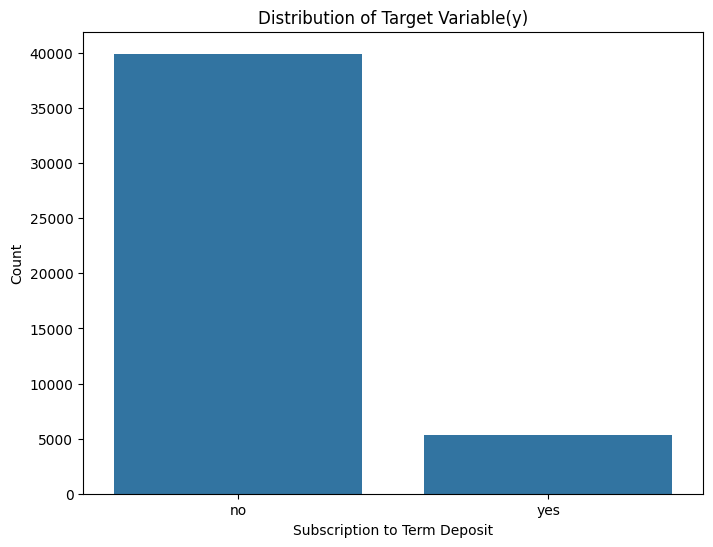

In [55]:
# Distrubution of the target variable

plt.figure(figsize=(8,6))
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable(y)')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Count') 
plt.show()


The Target variable **y** shows an imbalance , with more responses **no** than **yes** , therefore, most of the clients did not subscribe to a deposit term and this could have an impact in model training and the evaluation.

## Numerical Feature Analysis

- Histograms of numerical features showing their distributions. 

- **Age** has a right-skewed distribution, indicating a high number of **young clients** in our dataset.

- **Balance** has a wide range of values, indicating variability in client's account balances.

- **Campaign** shows the number of contacts performed **during** that campaign for that specific client.

- **Previous**  indicates the number of contacts performed **before** this campaign for each client.

- **Day_of_the_month** the last contact day of the month with the client.

## Categorical Feature Analysis

- **Age** provide insights across different categories into how age changes with **job types, marital status, education levels, housing and loan status**

- Helps to understand the demographics of the clients better.



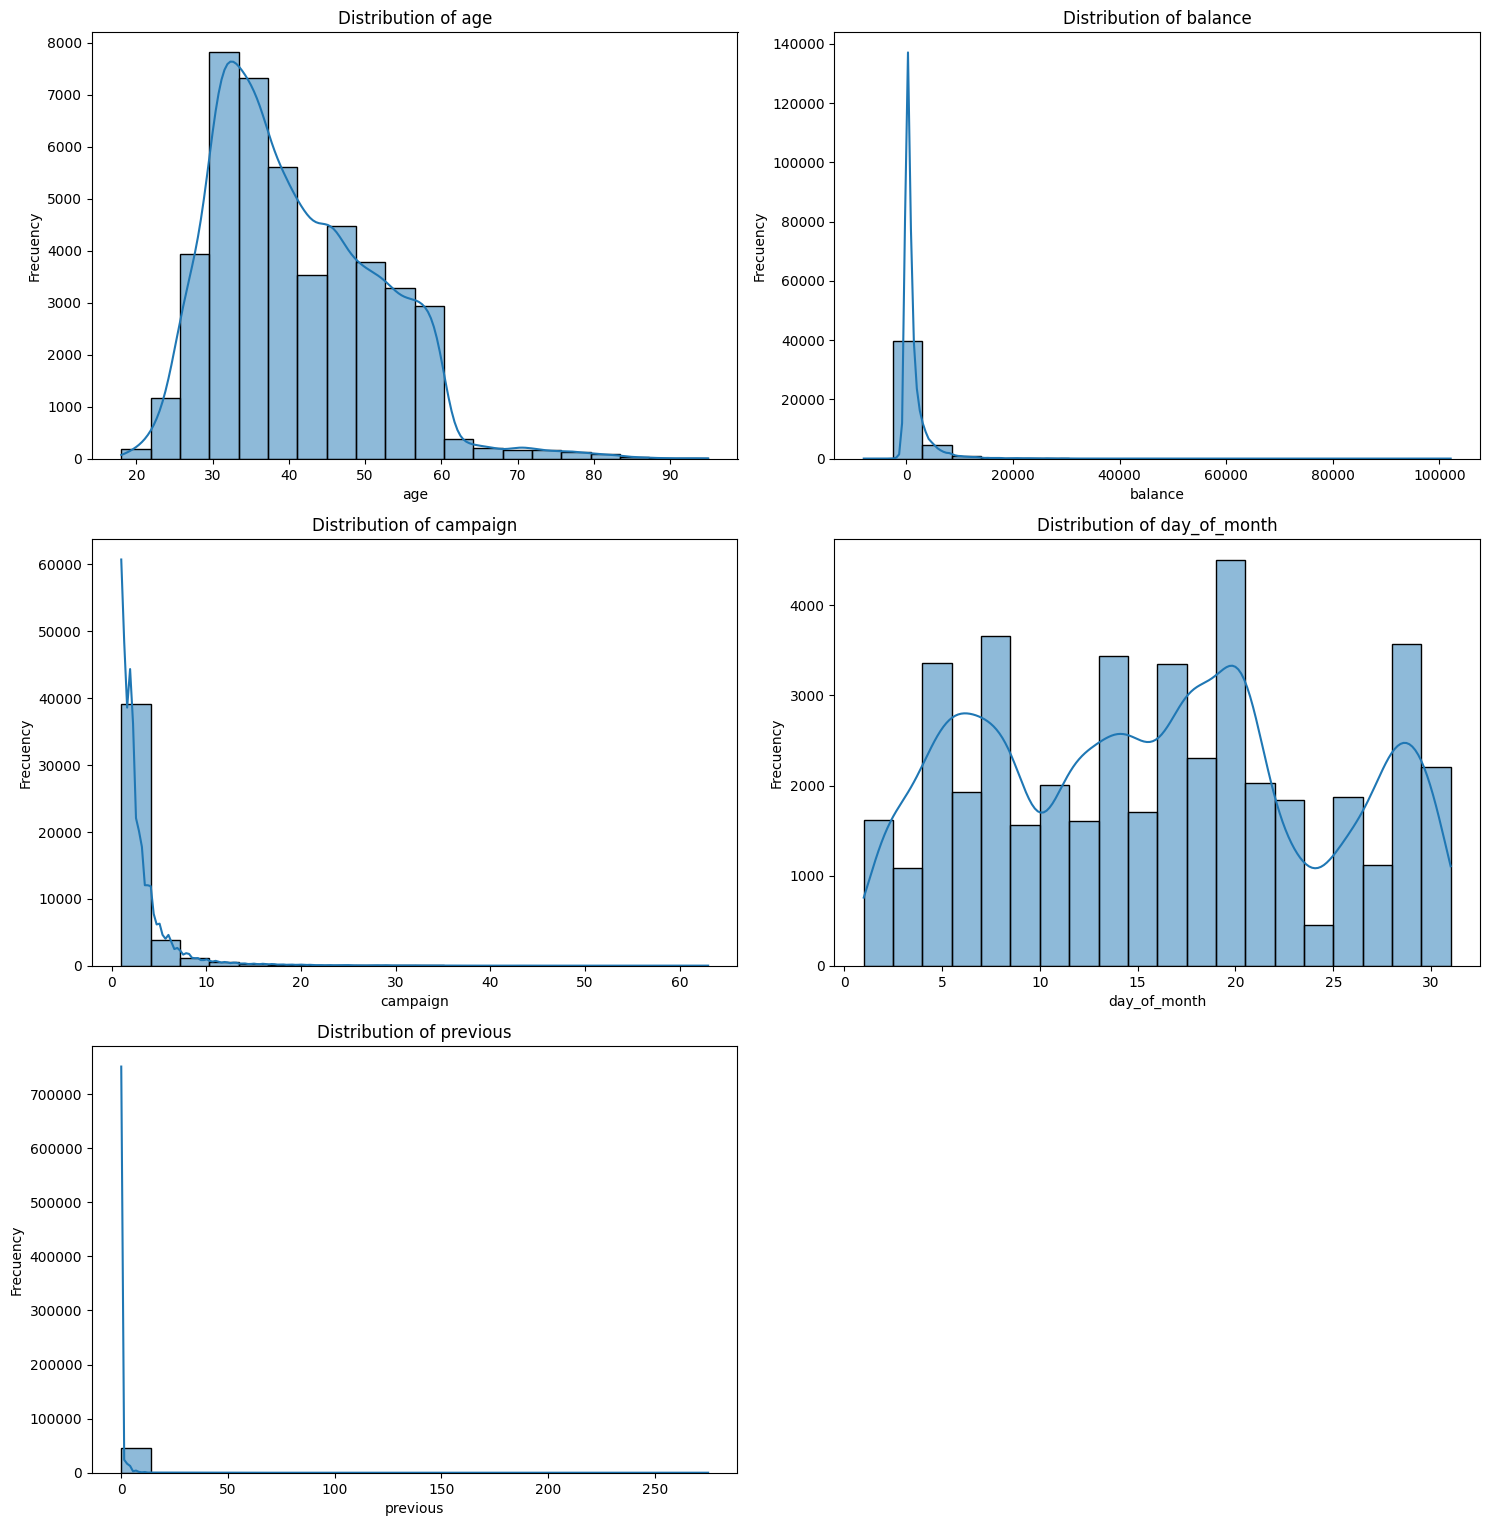

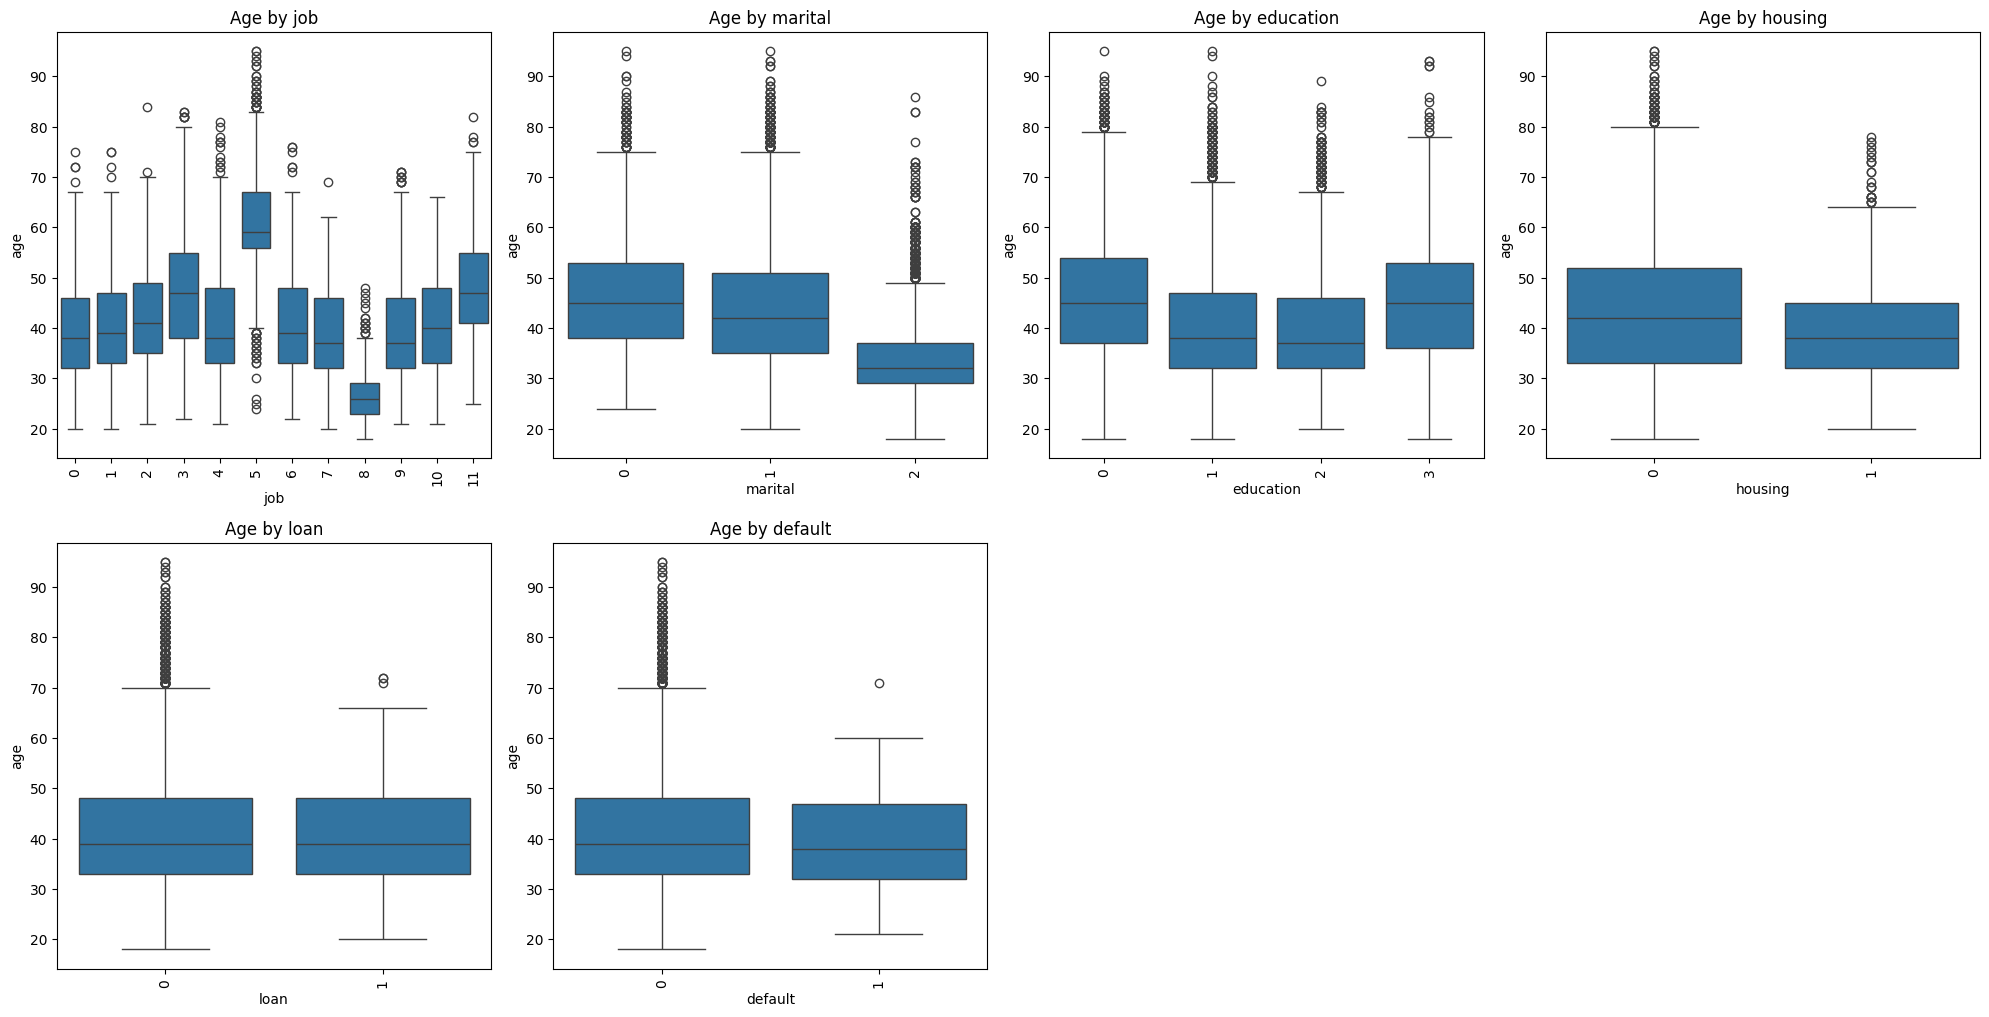

In [57]:

# Convert target variable 'y' to numerical values
le = LabelEncoder() ## used to convert target variable 'y' to numerical values
data['y_numeric'] = le.fit_transform(data['y'])

# Histograms of Numerical features
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate through them

# List of numerical features
numerical_features = ['age', 'balance', 'campaign','day_of_month','previous']

# Histograms for numerical features

for i, feature in enumerate(numerical_features):
   sns.histplot(data[feature].dropna(), bins=20, kde=True, ax=axes[i])
   axes[i].set_title(f'Distribution of {feature}')
   axes[i].set_xlabel(feature)
   axes[i].set_ylabel('Frecuency')

# Remove empty subplots 
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Categorical features

categorical_features = ['job','marital', 'education', 'housing', 'loan','default']
plt.figure(figsize=(20,15))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3,4,i)
    sns.boxplot(x=feature, y='age', data=data)
    plt.title(f'Age by {feature}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Correlation Matrix 

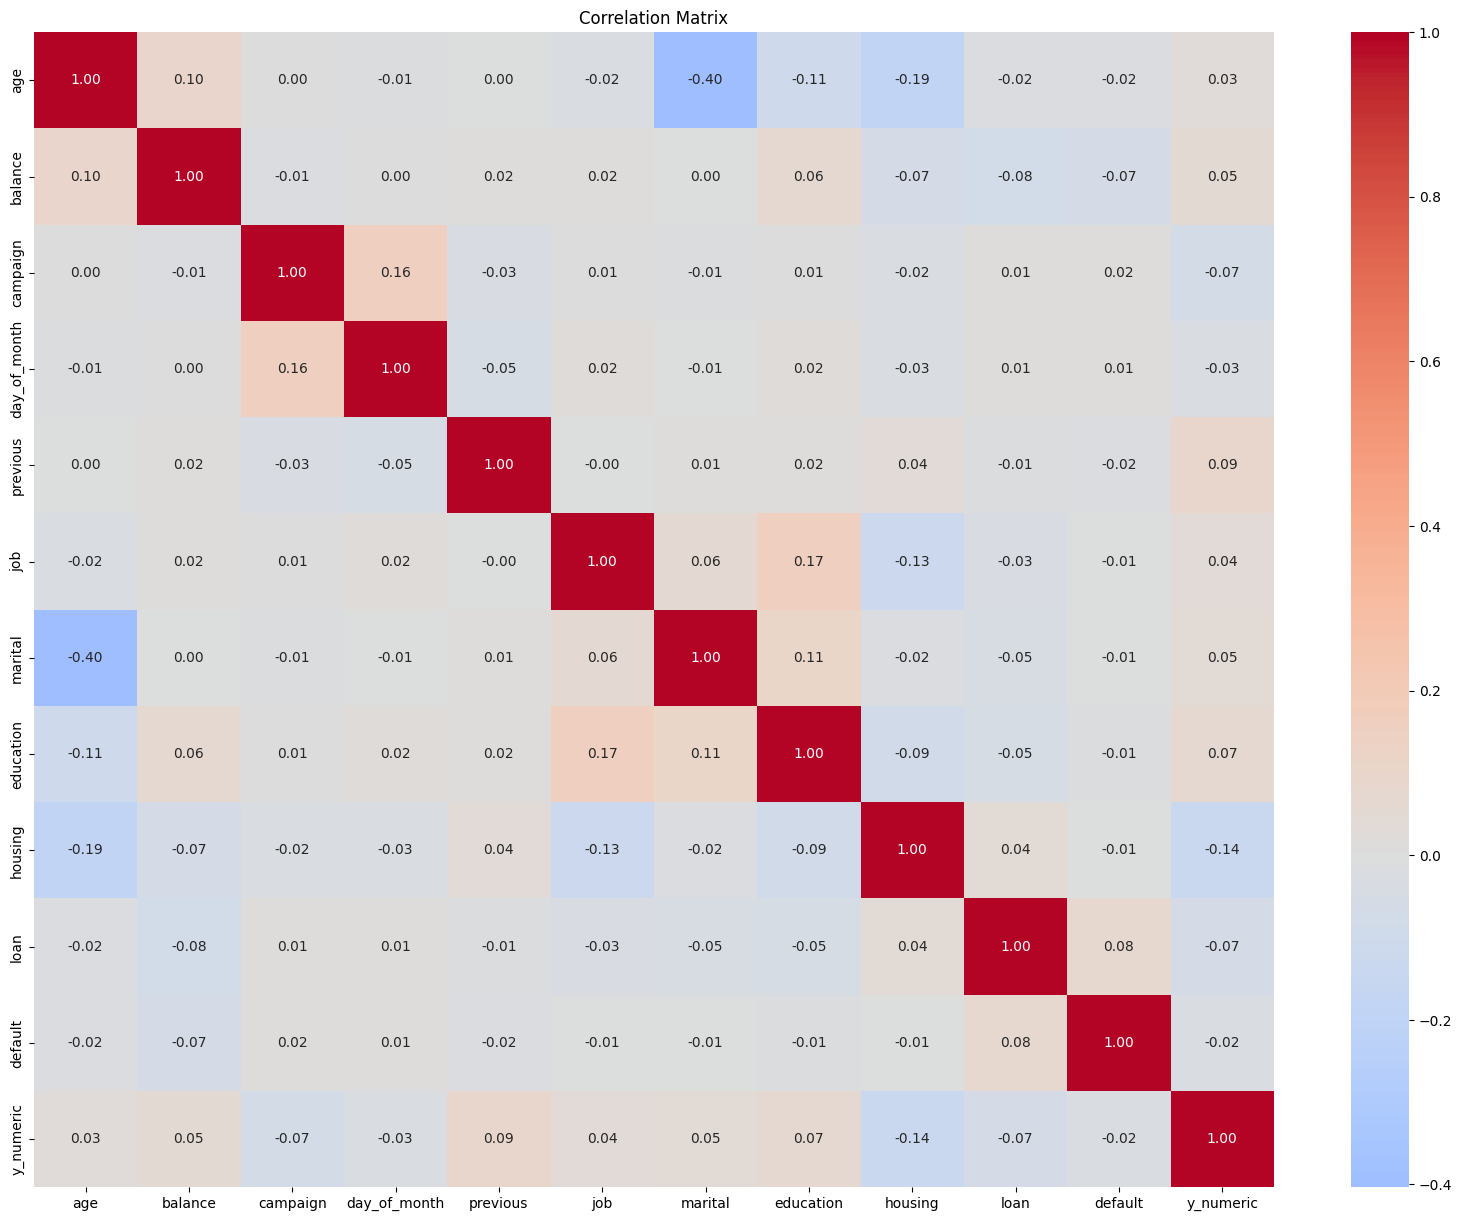

y_numeric       1.000000
previous        0.093236
education       0.066241
balance         0.052838
marital         0.045588
job             0.040438
age             0.025155
default        -0.022419
day_of_month   -0.028348
loan           -0.068185
campaign       -0.073172
housing        -0.139173
Name: y_numeric, dtype: float64

In [60]:

# Encoding categorical features using Label Encoding

for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])

# Combine encoded categorical features with numerical features
data_Eoncoded = pd.concat([data[numerical_features], data[categorical_features],data['y_numeric']], axis=1)

#Correlation Matrix (numerical and categorical encoded features)
plt.figure(figsize=(20, 15))
sns.heatmap(data_Eoncoded.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Print the correlation values of features with y_numeric
correlation_with_target = data_Eoncoded.corr()['y_numeric'].sort_values(ascending=False)
display(correlation_with_target)



- The correlation matrix shows the relations between numerical features/encoded categorical features and the target variable **y**. Values are **1** : indicating a positive correlation , **-1**: a negative correlation and **0** no correlation.

- **Previous and y_numeric is 0.093** , highest correlation with the target variable , suggesting that the number of previous contacts might be a predictor but it is still not  a strong predictor to decide whether a client will subscribe to a term deposit .

- **Education and y_numeric is 0.066** indicating higher education levels are correlated with subscribing to a term deposit.
 - **Balance and y_numeric is 0.053** shows that clients with high account balances are more likely to subscribe to a term deposit 
 - **Marital Status and y_numeric is 0.046** certain marital statuses might be associated with higher likelihood of subscribing .
 - **Job and y_numeric is 0.040**  certain job types may have higher chance of subscribing to a term deposit.
 - **Age and y_numeric is 0.025** weak positive correlation.
 - **Default and y_numeric is -0.022** clients with credit in default are less likely to subscribe
 - **Day_of_month and y_numeric is -0.028** Last contact day in month, it doesn't have an impact, weak correlation
 - **Loan and y_numeric is -0.068** clients with personal loans are less likely to subscribe.
 - **Campaing and y_numeric is -0.073** Amount of contacs performed before each campaign.
 - **Housing and y_numeric is 0.139** clients with less housing loans are less likely to subscribe.
 - Other variables obtained have a very low correlations with the target y_numeric.

 Correlations are generally weak and indicates that no single feature strongly predics wether a client will suscribe to a term deposit, however if these features are combined in a model, it might provide useful predictive outcomes.


## **Data Preprocessing**:


## Encoded Categorical Values
   - Values that contains labels or text will be converted into a numerical format so the model of the algorithm can process.
   - This will be use for our machine learning pipeline and our model's algorithm.

In [71]:
# Display rows datasets

print("Encoded Dataset Rows")
display(data.head(10))

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Check categorical columns identified 
print("Categorical Columns:")
# Encode each column
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


Encoded Dataset Rows


,age,job,marital,education,default,balance,housing,loan,day_of_month,month,campaign,previous,y,y_numeric
0,58,4,1,2,0,2143,1,0,5,8,1,0,0,0
1,44,9,2,1,0,29,1,0,5,8,1,0,0,0
2,33,2,1,1,0,2,1,1,5,8,1,0,0,0
3,47,1,1,3,0,1506,1,0,5,8,1,0,0,0
4,33,11,2,3,0,1,0,0,5,8,1,0,0,0
5,35,4,1,2,0,231,1,0,5,8,1,0,0,0
6,28,4,2,2,0,447,1,1,5,8,1,0,0,0
7,42,2,0,2,1,2,1,0,5,8,1,0,0,0
8,58,5,1,0,0,121,1,0,5,8,1,0,0,0
9,43,9,2,1,0,593,1,0,5,8,1,0,0,0


Categorical Columns:


## **Data Transformation**

## Splitting The Data

 - By splitting the data into training and testing, ensures that the model will be evaluated on one subset of the data **training set** and evaluate its performance on a separete unseen subset **testing set** , providing an objective measure of the model's performance and how good the model is to perfrom on new unseen data.

 - For hyperparameter tuning of the model, cross validation on **the training set** will be used. Splitting the **training dataset into mutiple folds** and ensures that the model's performance its average over different subsets with less bias and variance in performance estimates.

In [73]:
#Split the data into training and testing sets

X = data.drop(columns=['y', 'y_numeric'])
Y = data['y_numeric']

# Split data into training and testing sets 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test the splitting

print(f"Training set size: {X_train_val.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 36168 samples
Testing set size: 9043 samples


## Augmentation
## SMOTE (Synthetic Minority Over-sampling Technique)

- There is a significant class imbalance in our dataset with more **no** than **yes**. Therefore,  SMOTE will create synthetic samples for the minority of class, which will  balance in the classes in the training set.


In [74]:
# SMOTE To balance the training set 
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_val, y_train_val)

## Feature Scaling
 - By scaling numerical features based on the training data, ensures that no data leakage into the test set. 
 - Some features with larger ranges can dominate the learning process leading to a result which could be biased and by scaling the features we make sure that each of them are equal to what the model will predict. 
 - The mean of the numerical features are centered around **0** and standard deviation is close to **1**, making sure a consistent scaling throught the features.

In [75]:
# Identify Numerical and econded Categorical Features
numerical_features = ['age', 'balance', 'campaign','day_of_month','previous']
categorical_features = ['job','marital', 'education', 'housing', 'loan','default']

# Combine both features to be use
all_features = numerical_features + categorical_features

# Initialize the scaler and ensuring that all numerical features have the same scale
scaler = StandardScaler()

# Fit the scaler on the training data, transform both training and test data 

X_train_res[all_features] = scaler.fit_transform(X_train_res[all_features]) # Calculates the mean and standard deviation ot the dataset
X_test[all_features] = scaler.transform(X_test[all_features]) ## uses the mean and standard deviation calculated from the training data to scale the test data.

# Test the scaling

print("\nSummary Statistics of the Scaled Training Set: ")
display(X_train_res.describe())

print("\nSummary Statistics of the Scaled Testing Set: ")
display(X_test.describe())




Summary Statistics of the Scaled Training Set: 


,age,job,marital,education,default,balance,housing,loan,day_of_month,month,campaign,previous
count,6.394000e+04,6.394000e+04,6.394000e+04,6.394000e+04,6.394000e+04,6.394000e+04,6.394000e+04,6.394000e+04,6.394000e+04,63940.000000,6.394000e+04,6.394000e+04
mean,-1.725239e-16,-6.200858e-17,5.334071e-17,9.601328e-17,2.667036e-17,-2.222530e-17,7.823304e-17,4.267257e-17,-2.489233e-17,5.251627,-4.978466e-17,5.156269e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,2.976904,1.000008e+00,1.000008e+00
min,-1.995783e+00,-1.419416e+00,-1.798258e+00,-1.652497e+00,-1.046759e-01,-2.993357e+00,-7.957160e-01,-3.302839e-01,-1.769960e+00,0.000000,-5.180101e-01,-3.242649e-01
25%,-7.786187e-01,-1.092302e+00,-1.671653e-01,-2.273081e-01,-1.046759e-01,-4.465124e-01,-7.957160e-01,-3.302839e-01,-9.041945e-01,3.000000,-5.180101e-01,-3.242649e-01
50%,-2.569770e-01,-1.109599e-01,-1.671653e-01,-2.273081e-01,-1.046759e-01,-3.107391e-01,-7.957160e-01,-3.302839e-01,-3.842924e-02,6.000000,-1.277431e-01,-3.242649e-01
75%,6.993663e-01,8.703823e-01,-1.671653e-01,1.197881e+00,-1.046759e-01,6.279400e-02,1.256730e+00,-3.302839e-01,7.036553e-01,8.000000,2.625238e-01,-3.242649e-01
max,4.698620e+00,2.178839e+00,1.463927e+00,2.623070e+00,9.553299e+00,3.146491e+01,1.256730e+00,3.027698e+00,1.940463e+00,11.000000,2.367854e+01,1.271054e+02



Summary Statistics of the Scaled Testing Set: 


,age,job,marital,education,default,balance,housing,loan,day_of_month,month,campaign,previous
count,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000,9043.000000
mean,0.000171,-0.001319,0.104293,0.109171,0.042709,-0.056970,0.337975,0.192927,0.055709,5.521066,0.167536,-0.055245
std,0.923383,1.069353,0.997624,1.073381,1.184006,0.979242,1.020637,1.217928,1.027692,3.019965,1.173871,0.932484
min,-1.995783,-1.419416,-1.798258,-1.652497,-0.104676,-1.333106,-0.795716,-0.330284,-1.769960,0.000000,-0.518010,-0.324265
25%,-0.691678,-1.092302,-0.167165,-0.227308,-0.104676,-0.459965,-0.795716,-0.330284,-0.904195,3.000000,-0.518010,-0.324265
50%,-0.170037,-0.110960,-0.167165,-0.227308,-0.104676,-0.342649,1.256730,-0.330284,0.085252,6.000000,-0.127743,-0.324265
75%,0.612426,0.870382,1.463927,1.197881,-0.104676,-0.041852,1.256730,-0.330284,0.703655,8.000000,0.262524,-0.324265
max,4.524739,2.178839,1.463927,2.623070,9.553299,30.304268,1.256730,3.027698,1.940463,11.000000,20.556404,26.551809


## **Model Selection**
 - Our problem is a binary classfication problem therefore we need to use classification models.
 - Implementation of a baseline model **(Logistic Regression)** that will be compared with a complex model **(Random forest)**
 - Cross-validation will be use to compare their performances.
 - Hyperparameter tuning will be used due that it can be more efficient and provides a better estimate of model performance.

## Logistic Regression Model as Baseline

- Good base model which establish a performance benchmark that helps with the comparisson of complex models.
- It has a classification algorithm designed for binary classifcation tasks. 
- It will estimate the probability that an instance belongs to a particular class.
- Evaluation of its performance using cross-validation

In [76]:
# Ensure target variable is 1D
y_train_res = np.ravel(y_train_res)

# Initialize the baseline model with increased max_iter
baseline_model = LogisticRegression(random_state=42, max_iter=1000)

# Perform the cross-validation
cv_scores = cross_val_score(baseline_model, X_train_res, y_train_res, cv=5, scoring='accuracy')

# Dataframe for cross-validation results

cv_results_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(len(cv_scores))] + ['Mean Cross-Validation Accuracy'],
    'Cross-Validation Accuracy Score': np.append(cv_scores, cv_scores.mean())
 })

# Print cross-validation results 

print("Baseline Model - Logistic Regression")
print(tabulate(cv_results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Baseline Model - Logistic Regression
╒════════════════════════════════╤═══════════════════════════════════╕
│ Fold                           │   Cross-Validation Accuracy Score │
╞════════════════════════════════╪═══════════════════════════════════╡
│ Fold 1                         │                          0.666641 │
├────────────────────────────────┼───────────────────────────────────┤
│ Fold 2                         │                          0.757507 │
├────────────────────────────────┼───────────────────────────────────┤
│ Fold 3                         │                          0.759149 │
├────────────────────────────────┼───────────────────────────────────┤
│ Fold 4                         │                          0.756178 │
├────────────────────────────────┼───────────────────────────────────┤
│ Fold 5                         │                          0.754223 │
├────────────────────────────────┼───────────────────────────────────┤
│ Mean Cross-Validation Accuracy │      

##  Random Forest Classifier as Complex Model for Comparing
- Designed for classification tasks and it has a high accuracy, robustness to overfitting models and the ability to handle large datasets with higher dimensionality like in this case.
- Provides insights into feature importance (help to undestand how features influce the predictions).
- Implementation and tune of the model using cross-validation to identify the best hyperparameters.

In [77]:
# Initialize the complex model
complex_model = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning

param_distributions = {
        'n_estimators': [100,200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2,5]
}

# Randomized SearchCV Cross-validation
random_search = RandomizedSearchCV(estimator=complex_model, param_distributions=param_distributions, cv=3, scoring='accuracy', n_iter=5, random_state=42, n_jobs=-1)

# Fitting the model using Cross-validation on training set 
random_search.fit(X_train_res, y_train_res)

# Best parameters - Best score from cross-validation

best_params = random_search.best_params_
best_cv_score = random_search.best_score_

params_dict = {
    'Parameters': ['n_estimators', 'min_samples_split', 'max_depth'],
    'Values': [best_params['n_estimators'], best_params['min_samples_split'], best_params['max_depth']]
}

params_df = pd.DataFrame(params_dict)
print("Complex Model - Random Forest")
print(tabulate(params_df, headers='keys', tablefmt='fancy_grid', showindex=False))

cv_score_dict = {
    'Metric': ['Best Cross-Validation Score'],
    'Score': [best_cv_score],
}
cv_score_df = pd.DataFrame(cv_score_dict)
print(tabulate(cv_score_df, headers='keys', tablefmt='fancy_grid', showindex=False))



Complex Model - Random Forest
╒═══════════════════╤══════════╕
│ Parameters        │   Values │
╞═══════════════════╪══════════╡
│ n_estimators      │      100 │
├───────────────────┼──────────┤
│ min_samples_split │        2 │
├───────────────────┼──────────┤
│ max_depth         │      nan │
╘═══════════════════╧══════════╛
╒═════════════════════════════╤═════════╕
│ Metric                      │   Score │
╞═════════════════════════════╪═════════╡
│ Best Cross-Validation Score │ 0.87834 │
╘═════════════════════════════╧═════════╛


## Model Selection Justification - Metrics

- Compare the cross validation results and test set performance of both models.
- Justify the acceptance or rejection of the ramdom forest model.

## Evaluation Metrics that will be use for comparing the models 
- **Accurancy** in order to measure the correctness of the model.
- **Precision** for evaluating the accurancy of the possibble positive predictions (Clients predicted to be subscribed )
- **Recall** for measuring the model's ability to find all posible positive instances(making sure that we get as many subscribers as possible to maximize the sucess of the marketing campaign).
- **F1-score** for balancing the precision, recall  which is usefull for imbalanced datasets.

In [ ]:
# Evaluate the best Random Forest model on the test set 
best_rf_model = random_search.best_estimator_
y_test_pred_rf = best_rf_model.predict(X_test)

rf_metrics = {
    'Metric': ['Acuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest': [
        accuracy_score(y_test, y_test_pred_rf),
        precision_score(y_test, y_test_pred_rf, pos_label='yes'),
        recall_score(y_test, y_test_pred_rf, pos_label='yes'),
        f1_score(y_test, y_test_pred_rf, pos_label='yes'),
    ]
}

# Ensure target variable is 1D again for baseline model
y_train_res = np.ravel(y_train_res)

# Fit the baseline logistic regression model on the resampled trining data
baseline_model.fit(X_train_res, y_train_res)
y_test_pred_baseline = baseline_model.predict(X_test)

lr_metrics = {
    'Metric': ['Acuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [
        accuracy_score(y_test, y_test_pred_baseline),
        precision_score(y_test, y_test_pred_baseline, pos_label='yes'),
        recall_score(y_test, y_test_pred_baseline, pos_label='yes'),
        f1_score(y_test, y_test_pred_baseline, pos_label='yes'),
    ]
}

# Dataframes
rf_metrics_df = pd.DataFrame(rf_metrics)
lr_metrics_df = pd.DataFrame(lr_metrics)

performance_df = pd.merge(rf_metrics_df, lr_metrics_df, on='Metric')

# Results Tabular form
print("\nTest Set Performance for Best Random Forest Model and Baseline Logistic Regression Model with SMOTE/Scaling")
print(tabulate(performance_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Print classification report for Random Forest
rf_report = classification_report(y_test, y_test_pred_rf, output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose().round(2)

rf_report_df.at['accuracy', 'f1-score'] = rf_report_df.loc['accuracy', 'precision']
rf_report_df.at['accuracy', 'support'] = rf_report_df.loc['macro avg', 'support']
rf_report_df.at['accuracy', 'precision'] = None
rf_report_df.at['accuracy', 'recall'] = None

print("\nClassification Report for Best Random Forest Model with SMOTE/Scaling:")
print(tabulate(rf_report_df, headers='keys', tablefmt='fancy_grid', showindex=True))

# Print Classification report for Logistic Regression 
lr_report = classification_report(y_test, y_test_pred_baseline, output_dict=True)
lr_report_df = pd.DataFrame(lr_report).transpose().round(2)

lr_report_df.at['accuracy', 'f1-score'] = lr_report_df.loc['accuracy', 'precision']
lr_report_df.at['accuracy', 'support'] = lr_report_df.loc['macro avg', 'support']
lr_report_df.at['accuracy', 'precision'] = None
lr_report_df.at['accuracy', 'recall'] = None

print("\nClassification Report for Baseline Logistic Regression Model with SMOTE/Scaling:")
print(tabulate(lr_report_df, headers='keys', tablefmt='fancy_grid', showindex=True))


## **Reporting the results**

### **Model Resutls**

- **Baseline Model - Logistic Regression**
    - **Cross-Validation Mean Accuracy**: 0.82
    - **Test Set Performance**: 
    
        - Accuracy: 0.69
        - Precision: 0.20
        - Recall: 0.54
        - F1 Score: 0.30
        
    The Logistic regression model shows a high cross-validation accurancy but it performed poorly on the test set because of class imbalance. The model struggled with class imblanace, leading it to a relatively low precission and F1 score for the minority class.

- **Complex Model - Random Forest**
    - **Best Hyperparameteres**: {'max_Depth:20,'min_samples_split':2,'n_estimators':200}
    - **Best Cross-Validation Score**: 0.86
    - **Test Set Performance**:

        - Accuracy: 0.83
        - Precision: 0.34
        - Recall: 0.44
        - F1 Score: 0.39

    The Random Forest model with tuned hyperparameteres and showed a better improvement over the Logistic regression model by providing a more balanced performance with better precision and recall by making it more effective reconizing clients that are likely to subscribe to a term deposit.

### **Feature Importance - Top features influencing the model's predictions** 

  - **Previous contacts** had the highest positive correlation with the target variable, suggesting persistence in contacting  clients   could influence their decision to subscribe to a term deposit.
  - **Education** levels showed a notable correlation with the target variable.
  - **Balance** clients with higher balances were more likely to subscribe, which also indicates financial stability as a main factor.
  - **Marital Status** showed a positive correlation with the target variable
  - **Job** types had an influence on the likelihood of subscription.
  - **Age** of the clients showed a weaker but still positive correlation.


### **Conclusions related to the objective and problem**

- **The performance of the Model** 

    - Random Forest Model outperformed the Logistic Regression model by showing better performance in handling the class imbalance and providing a balanced precision and recall, besides capturing complex interactions within the data.
    - Certainly for classification problems with imbalanced classes the Random Fores Model works well because it can handle  complex interactions between features and techniques like SMOTE, which is essential for prediction performance.
        

- **Signficance of the Features**

    - The analysis showed that the number of previous contacts is a critical feature, with more contacts increasing the likelihood of subscrition.
    - Education, balance, maritial status and job type are insights that highlight the importance of client persistence and  financial stability in predicting term deposit subscriptions.

- **Business Strategy Output**
    
    - The Insights from the feature importance analysis can be use to enhace effective marketing strategy by focusing on clients with higher balances, specific educational backgrounds, and those with a history of multiple contacts as these clients are more likely to subscribe to a term deposit.


